<div style="text-align: center;">
    <font size="25" color="white">HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS</font>
</div>

<div style="text-align: center;">
    <img src="stethoscope-stat.jpg" alt="News Feast" style="width: 100%; max-width: 900px;">
</div>

## Table of Contents

* [1. Project Overview](#chapter1)
  * [1.1 Introduction](#section_1_1)
      * [1.1.1 Problem Statement](#sub_section_1_1_1)
      * [1.1.2 Objectives](#sub_section_1_1_2)
* [2. Importing Packages](#chapter2)
* [3. Loading Data](#chapter3)
* [4. Data Cleaning](#chapter4)
* [5. Exploratory Data Analysis (EDA)](#chapter5)
* [6. Data Pre-processing](#chapter6)
* [7. Model training](#chapter7)
* [8. Model Performance Comparison and evaluation](#chapter8)
* [9. Fine-tune model parameters and hyperparameters](#chapter9)
* [10. MLFlow Tracking](#chapter10)
* [11. Recommendations](#chapter11)
* [12. Conclusion](#chapter12)

# <font color=black>1. Project Overview</font> <a class="anchor" id="chapter1"></a>

Healthcare fraud is a pervasive issue affecting healthcare systems globally, including South Africa. One of the most concerning forms of fraud in South Africa is related to medico-legal claims, which involve healthcare providers, often in collaboration with patients and legal professionals, filing fraudulent claims for compensation. These fraudulent activities not only burden the healthcare system but also lead to financial losses for insurance companies and government health programs.Medico-legal fraud in South Africa typically involves cases where medical professionals inflate claims, bill for services that were never provided, or misrepresent the nature of treatments to secure higher payouts. These practices contribute to soaring healthcare costs and place an unnecessary strain on already limited public health resources. Given the complexity of these fraud cases and the significant financial impact they have on the healthcare system, there is a pressing need for an advanced fraud detection model that can accurately identify and flag potentially fraudulent claims. 

In this project we explore Provider fraus dataset to develop a model that will detect fraudlent claims. The model will be trained using data from inpatient claims, outpatient claims, and beneficiary details. 
Healthcare fraud and abuse take many forms. Some of the most common types of frauds by providers are:

a) Billing for services that were not provided.

b) Duplicate submission of a claim for the same service.

c) Misrepresenting the service provided.

d) Charging for a more complex or expensive service than was actually provided.

e) Billing for a covered service when the service actually provided was not covered.

The goal of this project is to " predict the potentially fraudulent providers " based on the claims filed by them.along with this, we will also discover important variables helpful in detecting the behaviour of potentially fraud providers. further, we will study fraudulent patterns in the provider's claims to understand the future behaviour of providers.



<b>Dataset Overview:</b>

The dataset consists of three primary components—Inpatient Data, Outpatient Data, and Beneficiary Details—used to detect potentially fraudulent behaviors in medico-legal claims. Each dataset provides unique insights that, when combined, can help identify fraudulent patterns.

Inpatient Data:
Contains claims from patients admitted to hospitals, including admission and discharge dates, diagnosis codes, and services provided during the hospital stay.

Outpatient Data:
Captures claims from patients who were not admitted but visited healthcare providers for various treatments. It includes details on diagnoses and outpatient services.

Beneficiary Details:
Comprises patient-specific information, such as medical history, demographic details, and regional data, which can offer insights into the background and health profiles of claimants.

## 1.1.1 Problem Statement <a class="anchor" id="sub_section_1_1_1"></a>

Medico-legal fraud is a growing issue within South Africa’s healthcare system, where healthcare providers and other parties work together to file fraudulent claims. Common fraudulent practices include billing for services not rendered, submitting duplicate claims, and misrepresenting the nature of treatments to inflate claim payouts. These fraudulent activities lead to increased healthcare costs and put a strain on both insurance companies and government programs.

The goal of this project is to build a fraud detection model that can accurately identify fraudulent healthcare providers. By leveraging inpatient, outpatient, and beneficiary data, the project will uncover critical features and fraud patterns that will improve fraud detection, reduce financial losses, and strengthen the overall healthcare system.

## 1.1.2 Objectives <a class="anchor" id="sub_section_1_1_2"></a>

The primary objective of this project is to develop a model to detect potentially fraudulent healthcare providers involved in medico-legal claims in South Africa. Specific goals include:

1. Develop a predictive model capable of identifying potentially fraudulent claims based on historical data from inpatient, outpatient, and beneficiary claims.

2. Identify significant variables and features that are most predictive of fraudulent activities within the dataset.

3. Analyze fraudulent patterns and behaviors associated with healthcare providers who are frequently involved in suspicious medico-legal claims.
   

# <font color=white>2. Importing Packages</font> <a class="anchor" id="chapter2"></a>

In [39]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# <font color=white> 3. Loading Data</font> <a class="anchor" id="chapter3"></a>

In [40]:
#Load the train dataset
train_beneficiary = pd.read_csv("C:\\_repos\\Workplace_project\\Exploring-_healthcare\\Train_Beneficiarydata-1542865627584.csv")
train_inpatient = pd.read_csv("C:\\_repos\\Workplace_project\\Exploring-_healthcare\\Train_Inpatientdata-1542865627584.csv")
train_outpatient = pd.read_csv("C:\\_repos\\Workplace_project\\Exploring-_healthcare\\Train_Outpatientdata-1542865627584.csv")

In [41]:
print(f"beneficiay dataset shape is {train_beneficiary.shape}.")
print(f"inpatient dataset shape is {train_inpatient.shape}.")
print(f"Outpatient dataset shape is {train_outpatient.shape}.")

beneficiay dataset shape is (138556, 25).
inpatient dataset shape is (40474, 30).
Outpatient dataset shape is (517737, 27).


In [42]:
train_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [43]:
train_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [44]:
train_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

# <font color=white> 4. Data cleaning</font> <a class="anchor" id="chapter4"></a>

In [49]:
def check_nulls(df):
    null_values = df.isnull().sum()
    print("Columns with null values:\n", null_values[null_values > 0])
    
    return df

In [50]:
df_beneficiary = check_nulls(train_beneficiary)
df_beneficiary

Columns with null values:
 DOD    137135
dtype: int64


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [51]:
df_inpatient = check_nulls(train_inpatient)

Columns with null values:
 AttendingPhysician       112
OperatingPhysician     16644
OtherPhysician         35784
DeductibleAmtPaid        899
ClmDiagnosisCode_2       226
ClmDiagnosisCode_3       676
ClmDiagnosisCode_4      1534
ClmDiagnosisCode_5      2894
ClmDiagnosisCode_6      4838
ClmDiagnosisCode_7      7258
ClmDiagnosisCode_8      9942
ClmDiagnosisCode_9     13497
ClmDiagnosisCode_10    36547
ClmProcedureCode_1     17326
ClmProcedureCode_2     35020
ClmProcedureCode_3     39509
ClmProcedureCode_4     40358
ClmProcedureCode_5     40465
ClmProcedureCode_6     40474
dtype: int64


In [52]:
df_outpatient = check_nulls(train_outpatient)

Columns with null values:
 AttendingPhysician         1396
OperatingPhysician       427120
OtherPhysician           322691
ClmDiagnosisCode_1        10453
ClmDiagnosisCode_2       195380
ClmDiagnosisCode_3       314480
ClmDiagnosisCode_4       392141
ClmDiagnosisCode_5       443393
ClmDiagnosisCode_6       468981
ClmDiagnosisCode_7       484776
ClmDiagnosisCode_8       494825
ClmDiagnosisCode_9       502899
ClmDiagnosisCode_10      516654
ClmProcedureCode_1       517575
ClmProcedureCode_2       517701
ClmProcedureCode_3       517733
ClmProcedureCode_4       517735
ClmProcedureCode_5       517737
ClmProcedureCode_6       517737
ClmAdmitDiagnosisCode    412312
dtype: int64


In [53]:
df_beneficiary['DOB'] = pd.to_datetime(df_beneficiary['DOB'], format='%Y-%m-%d')

In [54]:
df_beneficiary['DOD'] = pd.to_datetime(df_beneficiary['DOD'], format='%Y-%m-%d')

In [55]:
df_beneficiary["DOD"].max()

Timestamp('2009-12-01 00:00:00')

The most recent Date of Death (DOD) recorded is December 1, 2009, suggesting that the Beneficiary Details data dates back to 2009. To facilitate age calculation, missing values in the DOD column have been replaced with '2009-12-01'

In [56]:
df_beneficiary["DOD"] = df_beneficiary["DOD"].fillna("2009-12-01")


In [57]:
df_beneficiary['Age'] = df_beneficiary['DOD'].dt.year-df_beneficiary['DOB'].dt.year

# <font color=white>5. Exploratory Data Analysis</font> <a class="anchor" id="chapter5"></a>

## <font color=white>5.1 Beneficiary data exploration</font> <a class="anchor" id="chapter5"></a>

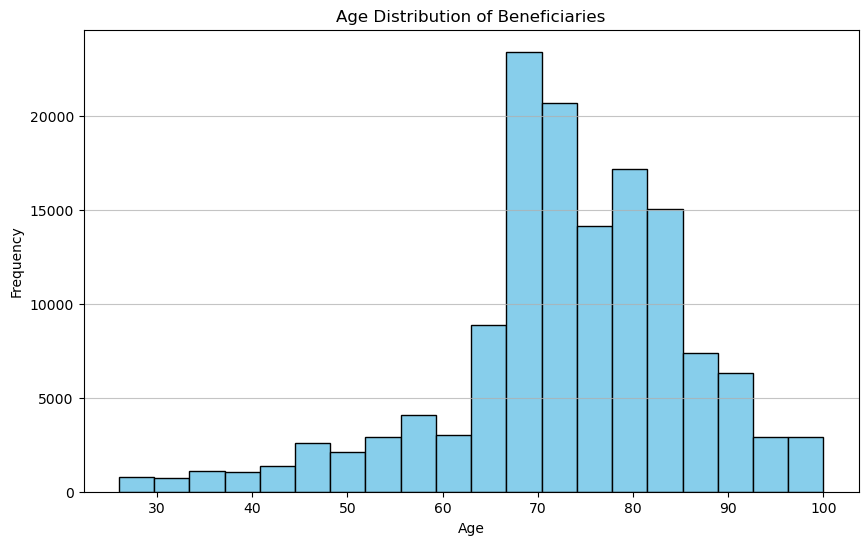

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(df_beneficiary['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Beneficiaries')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

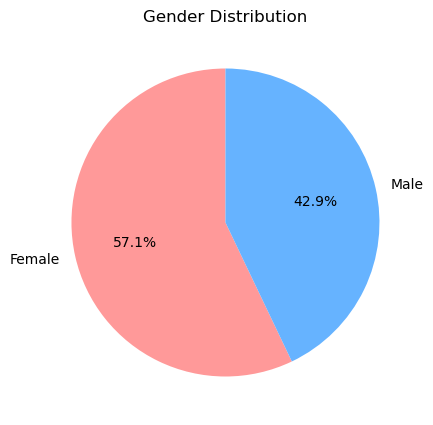

In [62]:
#Visualise the distribution of genders in the dataset

gender_counts = df_beneficiary['Gender'].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(gender_counts.values, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Gender Distribution')

plt.show()


In [65]:
df_beneficiary['County']

array([230, 280, 590, 270, 680, 810, 610, 140,  30, 360, 982,  10, 780,
       400, 120,  50, 470,  20, 892, 200, 170, 500, 710, 760,  90, 130,
       141, 150, 700, 390, 620, 260, 930, 734, 250, 510,  60, 563, 570,
        40, 340, 100, 290, 660, 350, 770, 180, 460, 580, 430, 880, 690,
       310, 550, 190, 490, 600, 220, 790, 990, 370, 420,   0, 980, 480,
       450, 960, 160, 800, 410, 520, 380, 991, 110, 540, 910, 240, 440,
        70, 860, 640, 870, 560, 650, 830, 330, 820,  25, 451, 320, 530,
       831, 950,  80, 921, 940, 630, 720, 989, 331, 840, 758, 421, 722,
       730, 561, 750, 791, 947, 551, 801, 953, 411, 681, 300, 970, 757,
       241, 210, 988, 890, 756, 221, 843, 581, 702, 999,  11, 711, 670,
       328, 943, 981, 591, 754, 986, 431, 194, 885, 740, 900, 871, 641,
       653, 911, 879, 992, 622, 291, 812, 562, 976, 920, 311, 288, 752,
       811, 850, 191, 461, 821, 223, 792, 984, 611, 882, 794, 891, 962,
       983, 772, 842, 341, 841, 211, 511, 971, 881, 564, 541, 94

In [ ]:
race_count = df_beneficiary['Race'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=gender_counts.values, y=gender_counts)

In [ ]:
race_count 

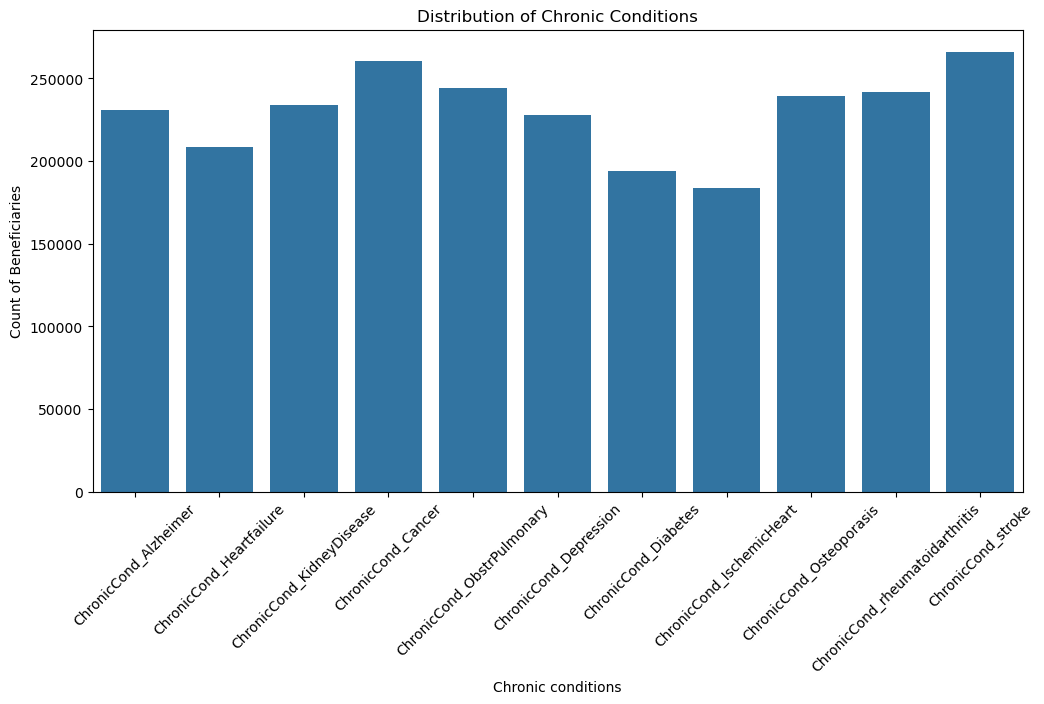

In [37]:
chronic_conditions = df_beneficiary.filter(like='ChronicCond_').sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=chronic_conditions.index, y=chronic_conditions.values)
plt.title('Distribution of Chronic Conditions')
plt.xticks(rotation=45)
plt.ylabel('Count of Beneficiaries')
plt.xlabel("Chronic conditions")
plt.show()

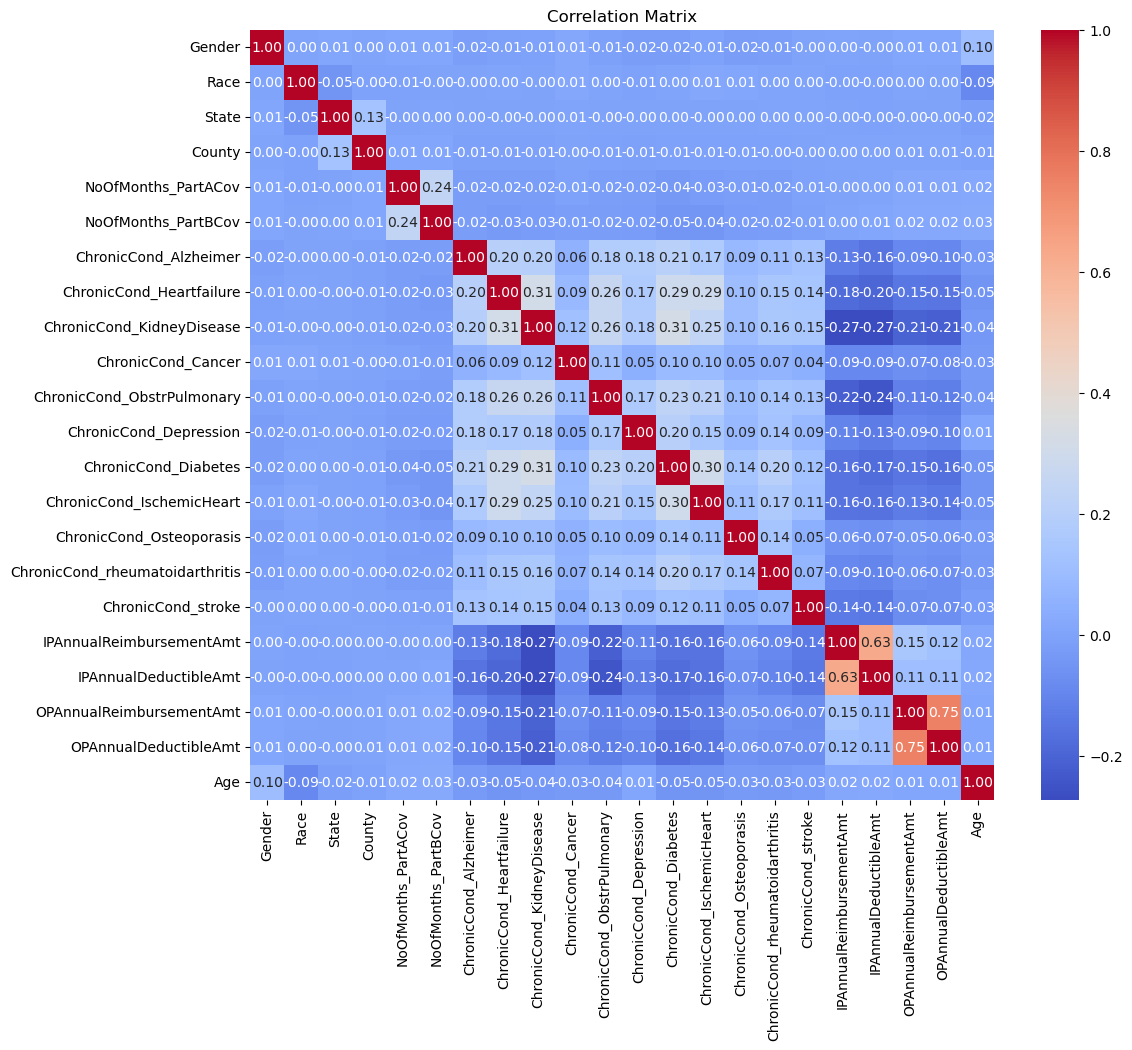

In [40]:
# Select only numeric columns
numeric_df = df_beneficiary.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [63]:
df_beneficiary['RenalDiseaseIndicator'][:0]

Series([], Name: RenalDiseaseIndicator, dtype: object)

# <font color=black> 6. Data Pre-processing</font> <a class="anchor" id="chapter6"></a>

# <font color=black> 7. Model training</font> <a class="anchor" id="chapter7"></a>

# <font color=black>8. Model Performance Comparison and evaluation</font> <a class="anchor" id="chapter8"></a>

# <font color=black>9. Fine-tune model parameters and hyperparameters</font> <a class="anchor" id="chapter9"></a>

# <font color=black>10. MLFlow Tracking</font> <a class="anchor" id="chapter10"></a>

# <font color=black>11. Recommendations</font> <a class="anchor" id="chapter11"></a>

# <font color=black>12. Conclusion</font> <a class="anchor" id="chapter12"></a>